__IMPORTING NECESSARY LIBRARIES AND LOADING THE DATASET__

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from bayes_opt import BayesianOptimization

data=pd.read_csv("transaction.csv")

__EXPLORATORY DATA ANALYSIS__

In [46]:
print("\nFirst Few Rows:")
print(data.head())


First Few Rows:
                         Transaction ID            Timestamp      Sender Name  \
0  a1b8c858-81c7-4dd1-8f62-7bcad3da1608  2024-06-26 20:05:58      Purab Sibal   
1  9cdb29ba-3a81-4cc3-8857-cefc7be8f06b  2024-06-15 09:23:01       Badal Buch   
2  7d3a4934-f221-4f11-899c-97e005577bef  2024-06-11 23:56:23  Aaina Zachariah   
3                        generated-1322  2024-06-17 00:43:46   Anya Bhatnagar   
4  faf020fb-feea-415e-91f5-ed8ba5c76d60  2024-06-08 14:58:05  Priyansh Doctor   

           Sender UPI ID          Receiver Name        Receiver UPI ID  \
0  5493877237@okhdfcbank          Lakshit Bajaj      3880211935@okaxis   
1     5368072758@okicici  Anahi Balasubramanian  4741526128@okhdfcbank   
2  5406686306@okhdfcbank            Zoya Rattan     8296036861@okicici   
3       2665817032@okybl           Akarsh Jaggi      1176383390@okaxis   
4  6898542101@okhdfcbank         Khushi Ganguly     4387878239@okicici   

   Amount (INR)   Status  
0   3335.390000   Failed

In [47]:
# Display basic information about the dataset
print("Basic Info:")
data.info()

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction ID   1500 non-null   object 
 1   Timestamp        1500 non-null   object 
 2   Sender Name      1500 non-null   object 
 3   Sender UPI ID    1500 non-null   object 
 4   Receiver Name    1500 non-null   object 
 5   Receiver UPI ID  1500 non-null   object 
 6   Amount (INR)     1500 non-null   float64
 7   Status           1500 non-null   object 
dtypes: float64(1), object(7)
memory usage: 93.9+ KB


In [48]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Transaction ID     0
Timestamp          0
Sender Name        0
Sender UPI ID      0
Receiver Name      0
Receiver UPI ID    0
Amount (INR)       0
Status             0
dtype: int64


In [49]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
       Amount (INR)
count   1500.000000
mean    4961.542782
std     2895.564163
min       28.520000
25%     2415.486266
50%     4862.460000
75%     7255.108985
max    11255.173957


In [50]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Hour'] = data['Timestamp'].dt.hour  
data['Day'] = data['Timestamp'].dt.day  
data['Weekday'] = data['Timestamp'].dt.weekday 
data.rename(columns={'Amount (INR)': 'Amount'}, inplace=True)


__VISUALISATIONS__

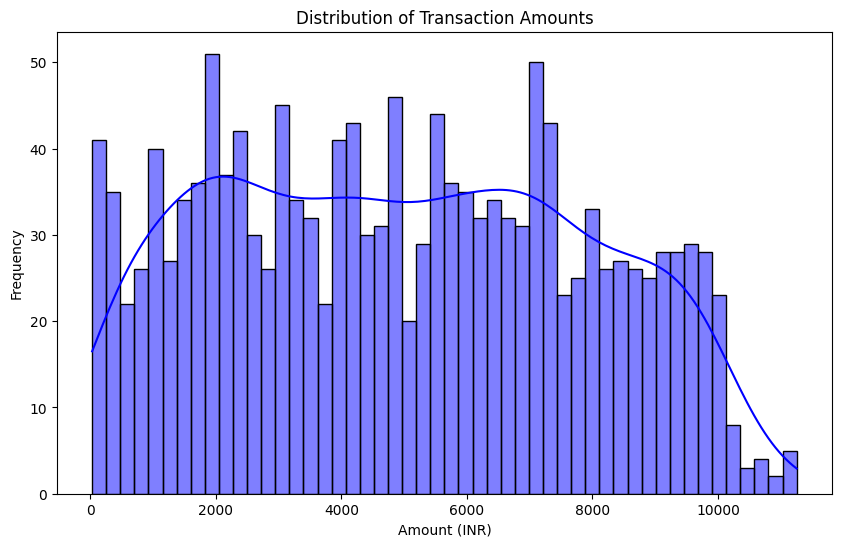

In [51]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount (INR)")
plt.ylabel("Frequency")
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_11608\2625913044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=data, palette='viridis')


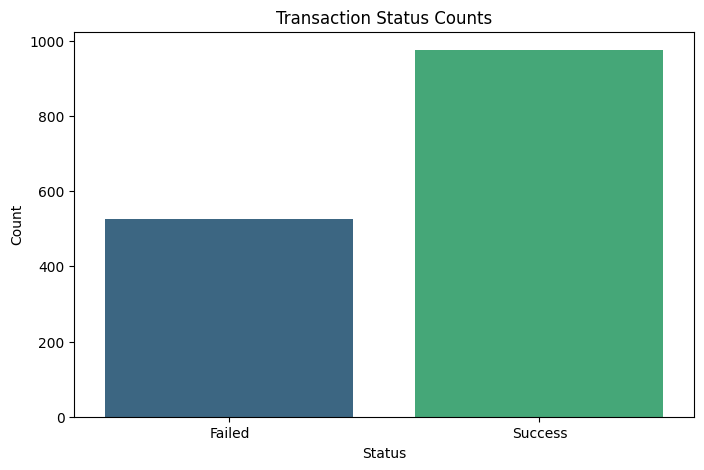

In [52]:
# Countplot for transaction statuses
plt.figure(figsize=(8, 5))
sns.countplot(x='Status', data=data, palette='viridis')
plt.title("Transaction Status Counts")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_11608\1380849925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_senders.values, y=top_senders.index, palette='coolwarm')


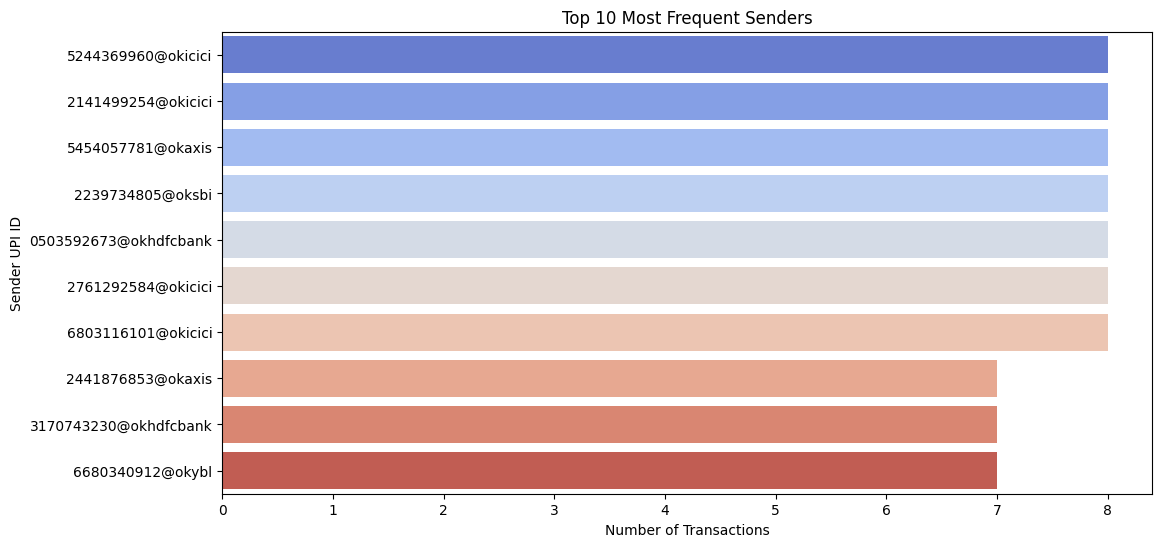

In [53]:
# Top 10 most frequent senders
plt.figure(figsize=(12, 6))
top_senders = data['Sender UPI ID'].value_counts().head(10)
sns.barplot(x=top_senders.values, y=top_senders.index, palette='coolwarm')
plt.title("Top 10 Most Frequent Senders")
plt.xlabel("Number of Transactions")
plt.ylabel("Sender UPI ID")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11608\3892618759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_receivers.values, y=top_receivers.index, palette='mako')


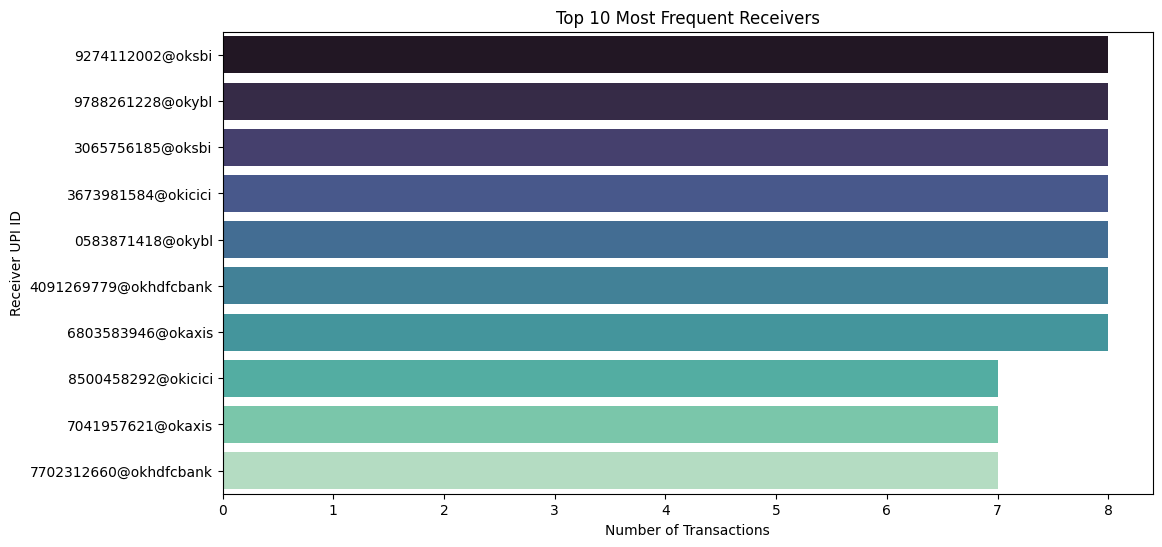

In [54]:
# Top 10 most frequent receivers
plt.figure(figsize=(12, 6))
top_receivers = data['Receiver UPI ID'].value_counts().head(10)
sns.barplot(x=top_receivers.values, y=top_receivers.index, palette='mako')
plt.title("Top 10 Most Frequent Receivers")
plt.xlabel("Number of Transactions")
plt.ylabel("Receiver UPI ID")
plt.show()


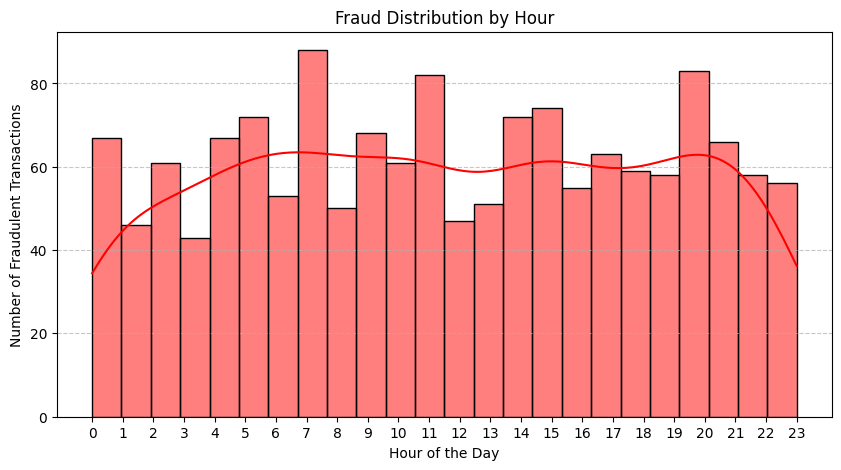

In [55]:
# Plot the histogram
plt.figure(figsize=(10, 5))
sns.histplot(data['Hour'], bins=24, kde=True, color='red')

# Formatting the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraud Distribution by Hour')
plt.xticks(range(0, 24)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

__BOX PLOT__

C:\Users\Admin\AppData\Local\Temp\ipykernel_11608\953954937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Amount', data=data, palette='Set2')


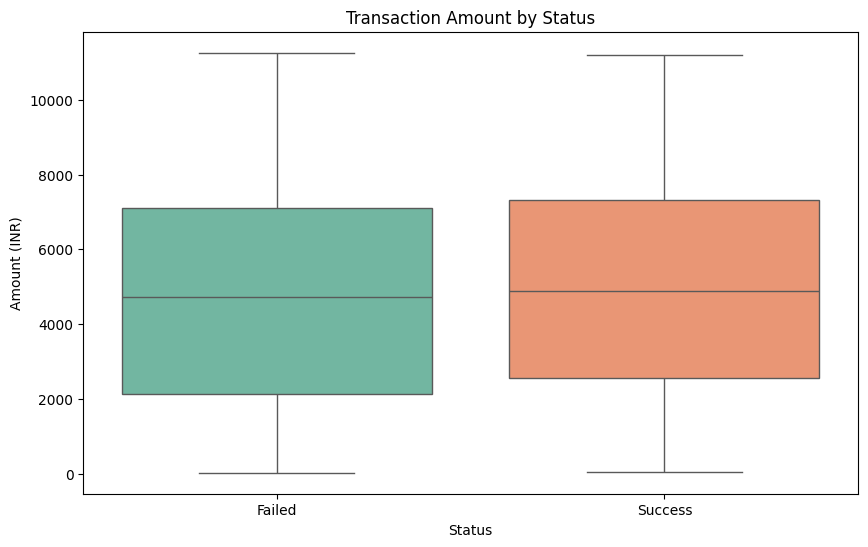

In [56]:
# Boxplot for transaction amount by status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Amount', data=data, palette='Set2')
plt.title("Transaction Amount by Status")
plt.xlabel("Status")
plt.ylabel("Amount (INR)")
plt.show()


__PAIR PLOT__

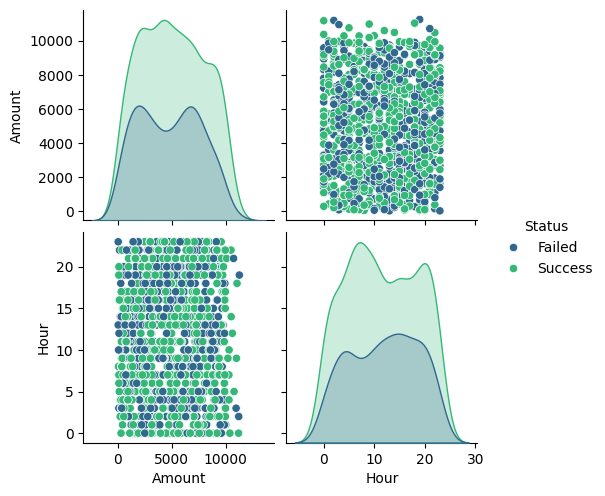

In [57]:
numeric_columns = ['Amount', 'Hour'] 
sns.pairplot(data[numeric_columns + ['Status']], hue='Status', diag_kind='kde', palette='viridis')
plt.show()

__CORRELATION HEAT MAP__

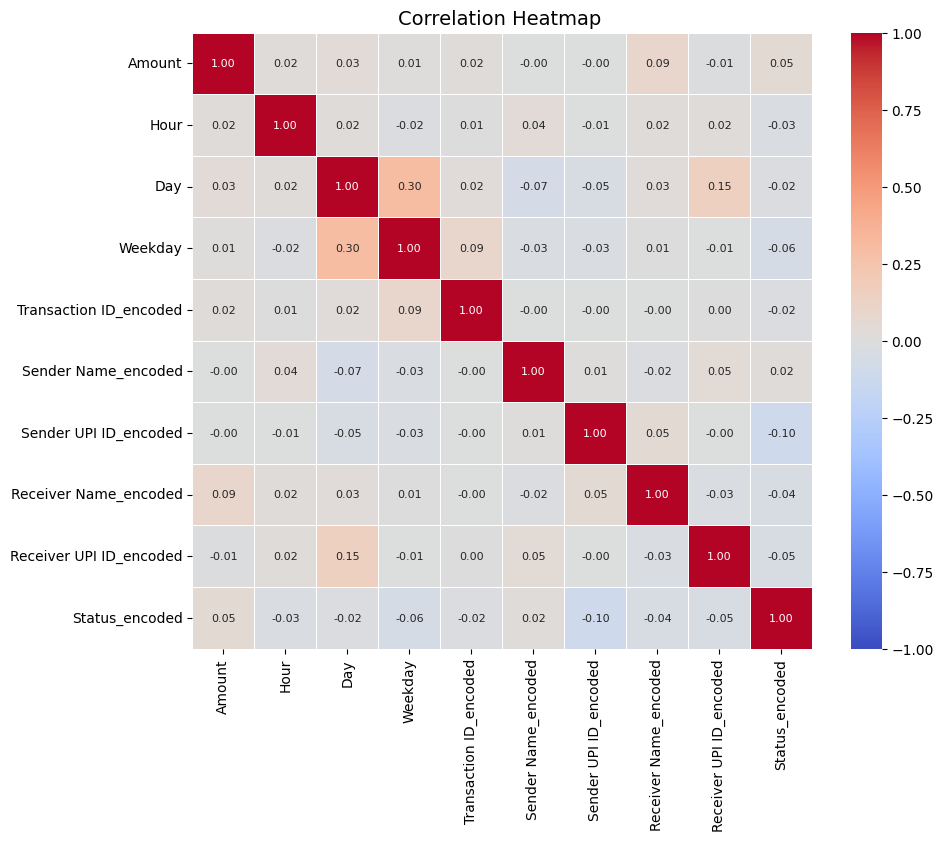

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode all categorical features
categorical_features = data.select_dtypes(include=['object']).columns

for col in categorical_features:
    data[col + '_encoded'] = LabelEncoder().fit_transform(data[col])

numeric_data = data.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, annot_kws={"size":8})

plt.title("Correlation Heatmap ", fontsize=14)
plt.show()


__PIVOT TABLES__

In [59]:
# Total transaction amount by status
pivot_total_amount_by_status = data.pivot_table(values='Amount',index='Status',aggfunc='sum')
print("Total Transaction Amount by Status:")
print(pivot_total_amount_by_status)

# Average transaction amount by sender
pivot_avg_amount_by_sender = data.pivot_table(values='Amount',index='Sender Name',aggfunc='mean').sort_values(by='Amount', ascending=False).head(10)
print("\nTop 10 Senders by Average Transaction Amount:")
print(pivot_avg_amount_by_sender)

# Transaction count by hour and status
pivot_transactions_by_hour = data.pivot_table(values='Transaction ID',index=data['Timestamp'].dt.hour,columns='Status',aggfunc='count').fillna(0)
print("\nTransaction Count by Hour and Status:")
print(pivot_transactions_by_hour)

# Top senders by total transaction amount
pivot_total_amount_by_sender = data.pivot_table(values='Amount',index='Sender Name',aggfunc='sum').sort_values(by='Amount', ascending=False).head(10)
print("\nTop 10 Senders by Total Transaction Amount:")
print(pivot_total_amount_by_sender)

# Top receivers by total transaction amount
pivot_total_amount_by_receiver = data.pivot_table(values='Amount',index='Receiver Name',aggfunc='sum').sort_values(by='Amount', ascending=False).head(10)
print("\nTop 10 Receivers by Total Transaction Amount:")
print(pivot_total_amount_by_receiver)



Total Transaction Amount by Status:
               Amount
Status               
Failed   2.504975e+06
Success  4.937339e+06

Top 10 Senders by Average Transaction Amount:
                        Amount
Sender Name                   
Rhea Mann         11255.173957
Azad Dutt         11197.938432
Taimur Barad      10481.910938
Parinaaz Kadakia  10341.056519
Ranbir Mahajan    10321.195080
Tiya Behl         10301.158639
Shanaya Bala      10279.140279
Nitara Divan      10222.111912
Kismat Deshpande  10177.017968
Divij Sandal      10167.688286

Transaction Count by Hour and Status:
Status     Failed  Success
Timestamp                 
0              19       48
1              16       30
2              16       45
3              19       24
4              31       36
5              24       48
6              14       39
7              19       69
8              19       31
9              18       50
10             23       38
11             26       56
12             23       24
13           

__RANDOM FOREST__

In [60]:
data['Status'] = data['Status'].astype(str).apply(lambda x: 1 if x.lower() == 'success' else 0)

le = LabelEncoder()
data['Sender Name'] = le.fit_transform(data['Sender Name'])
data['Receiver Name'] = le.fit_transform(data['Receiver Name'])
data['Sender UPI ID'] = le.fit_transform(data['Sender UPI ID'])
data['Receiver UPI ID'] = le.fit_transform(data['Receiver UPI ID'])

X = data.drop(['Transaction ID', 'Timestamp', 'Status'], axis=1)
y = data['Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99, shuffle=True)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)




In [61]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       299

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

Confusion Matrix:
[[151   0]
 [  0 299]]


__UNSUPERVISED LEARNING__

In [62]:
numeric_features = ['Amount', 'Hour'] 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_features])

__GAUSIAN MIXTURE METHOD__

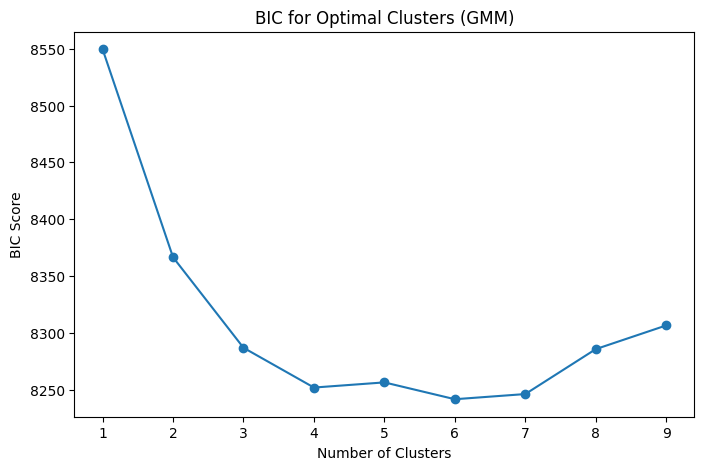


 Cluster Analysis:
                  Amount       Hour
GMM_Cluster                        
0            2742.446036   6.402893
1            8047.428301   9.867816
2            3874.924532  18.629555


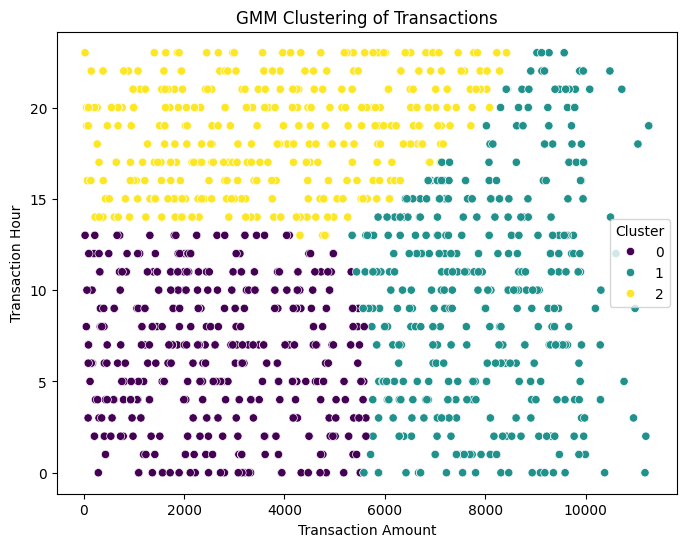

In [63]:
bic_scores = []
n_clusters_range = range(1, 10)  

for n in n_clusters_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(data_scaled)
    bic_scores.append(gmm.bic(data_scaled)) 


plt.figure(figsize=(8,5))
plt.plot(n_clusters_range, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC for Optimal Clusters (GMM)')
plt.show()

gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(data_scaled)

print("\n Cluster Analysis:")
print(data.groupby('GMM_Cluster')[numeric_features].mean())


plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Amount'], y=data['Hour'], hue=data['GMM_Cluster'], palette='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Hour')
plt.title('GMM Clustering of Transactions')
plt.legend(title='Cluster')
plt.show()


__GMM AFfter Bayesian Optimization__

|   iter    |  target   | n_comp... |
-------------------------------------
| 1         | 0.4027    | 4.996     |
| 2         | 0.3476    | 9.606     |
| 3         | 0.3385    | 7.856     |
| 4         | 0.3476    | 6.789     |
| 5         | 0.3696    | 3.248     |
| 6         | 0.4027    | 4.373     |
| 7         | 0.4027    | 4.687     |
| 8         | 0.3546    | 2.0       |
| 9         | 0.3647    | 5.513     |
| 10        | 0.3696    | 3.916     |
| 11        | 0.4027    | 4.373     |
| 12        | 0.3488    | 8.759     |
| 13        | 0.3546    | 2.691     |
| 14        | 0.4027    | 4.514     |
| 15        | 0.4027    | 4.863     |
| 16        | 0.3647    | 5.107     |
| 17        | 0.4027    | 4.193     |
| 18        | 0.3476    | 6.089     |
| 19        | 0.3385    | 7.308     |
| 20        | 0.3476    | 10.0      |
Optimal n_components for GMM based on Silhouette Score: 4

Cluster Analysis (Optimized GMM):
                            Amount       Hour
Optimized_GMM_Cluster    

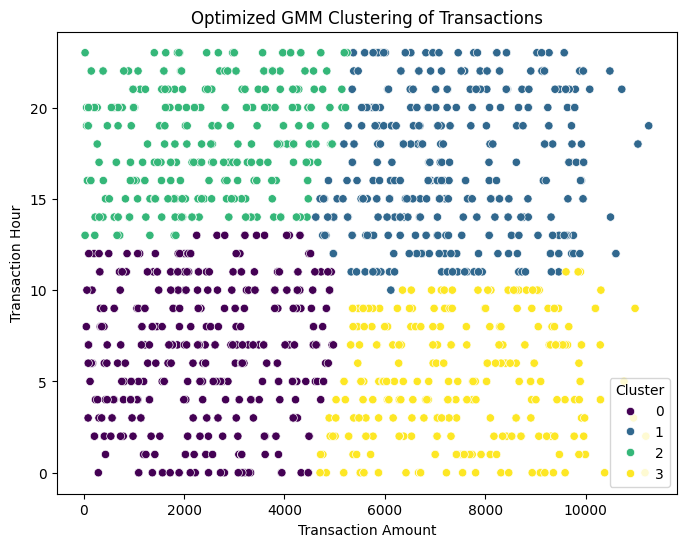

Optimized Clustering Performance:
Silhouette Score: 0.4027
Davies-Bouldin Score: 0.7748
Calinski-Harabasz Index: 1442.3044


In [64]:
# Define the objective function to maximize the silhouette score
def gmm_silhouette(n_components):
    n_components = int(n_components)
    # Ensure we have at least 2 clusters for silhouette score to be defined
    if n_components < 2:
        return -1.0
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(data_scaled)
    # If the clustering returns a single cluster, return a very low score
    if len(np.unique(labels)) < 2:
        return -1.0
    return silhouette_score(data_scaled, labels)

gmm_bo = BayesianOptimization(
    f=gmm_silhouette,
    pbounds={'n_components': (2, 10)},
    random_state=42
)

gmm_bo.maximize(init_points=5, n_iter=15)


best_n_components = int(gmm_bo.max['params']['n_components'])
print("Optimal n_components for GMM based on Silhouette Score:", best_n_components)

gmm_optimized = GaussianMixture(n_components=best_n_components, random_state=42)
data['Optimized_GMM_Cluster'] = gmm_optimized.fit_predict(data_scaled)

print("\nCluster Analysis (Optimized GMM):")
print(data.groupby('Optimized_GMM_Cluster')[numeric_features].mean())


plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Amount'], y=data['Hour'], hue=data['Optimized_GMM_Cluster'], palette='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Hour')
plt.title('Optimized GMM Clustering of Transactions')
plt.legend(title='Cluster')
plt.show()

sil_gmm_optimized = silhouette_score(data_scaled, data['Optimized_GMM_Cluster'])
db_gmm_optimized = davies_bouldin_score(data_scaled, data['Optimized_GMM_Cluster'])
ch_gmm_optimized = calinski_harabasz_score(data_scaled, data['Optimized_GMM_Cluster'])

print("Optimized Clustering Performance:")
print(f"Silhouette Score: {sil_gmm_optimized:.4f}")
print(f"Davies-Bouldin Score: {db_gmm_optimized:.4f}")
print(f"Calinski-Harabasz Index: {ch_gmm_optimized:.4f}")



__K MEANS CLUSTERING__

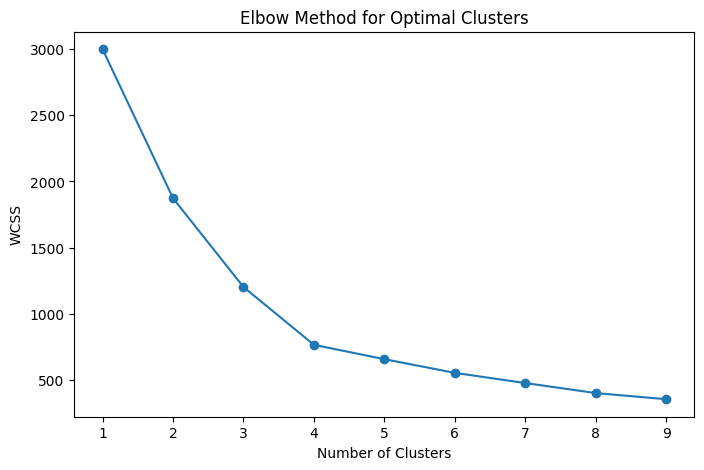


Cluster Analysis:
              Amount       Hour
Cluster                        
0        2752.213728   6.016913
1        8066.642720  10.102119
2        3846.317929  18.433071


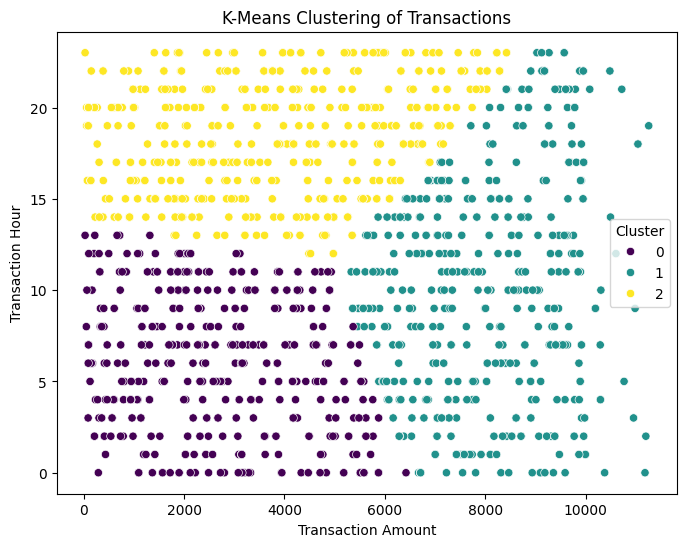

In [65]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply K-Means with the optimal number of clusters (let's assume 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Analyze clusters
print("\nCluster Analysis:")
print(data.groupby('Cluster')[numeric_features].mean())

# Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Amount'], y=data['Hour'], hue=data['Cluster'], palette='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Hour')
plt.title('K-Means Clustering of Transactions')
plt.legend(title='Cluster')
plt.show()


Best Hyperparameters from Grid Search:
Optimal number of clusters: 4
Optimal n_init: 30
Best Silhouette Score: 0.4046

Optimized Cluster Analysis:
                        Amount       Hour
Optimized_Cluster                        
0                  2603.586437  17.513228
1                  7545.087430  17.719780
2                  7553.797523   5.488827
3                  2518.717905   6.045000


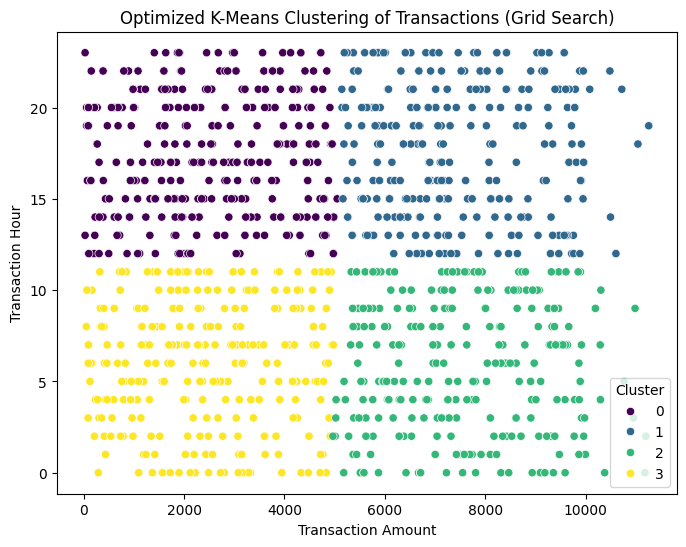

In [66]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assume data_scaled is already computed from your standardized data
# and numeric_features is defined, e.g., numeric_features = ['Amount', 'Hour']

# Define grid search parameter space
cluster_range = range(2, 11)  # n_clusters from 2 to 10
n_init_options = [10, 20, 30]

# Variables to store best score and parameters
best_silhouette = -1
best_params = {}

# Grid search loop
for n_clusters in cluster_range:
    for n_init in n_init_options:
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
        labels = kmeans.fit_predict(data_scaled)
        score = silhouette_score(data_scaled, labels)
        # Check if this combination yields a higher silhouette score
        if score > best_silhouette:
            best_silhouette = score
            best_params = {'n_clusters': n_clusters, 'n_init': n_init}

print("Best Hyperparameters from Grid Search:")
print(f"Optimal number of clusters: {best_params['n_clusters']}")
print(f"Optimal n_init: {best_params['n_init']}")
print(f"Best Silhouette Score: {best_silhouette:.4f}")

# Apply K-Means with the optimized hyperparameters
best_kmeans = KMeans(n_clusters=best_params['n_clusters'], 
                     n_init=best_params['n_init'], 
                     random_state=42)
data['Optimized_Cluster'] = best_kmeans.fit_predict(data_scaled)

# Analyze clusters after tuning
print("\nOptimized Cluster Analysis:")
print(data.groupby('Optimized_Cluster')[numeric_features].mean())

# Visualize the optimized clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Amount'], y=data['Hour'], hue=data['Optimized_Cluster'], palette='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Hour')
plt.title('Optimized K-Means Clustering of Transactions (Grid Search)')
plt.legend(title='Cluster')
plt.show()


__K MEANS After Bayesian Optimization__

|   iter    |  target   | n_clus... |
-------------------------------------
| 1         | 0.4046    | 4.996     |
| 2         | 0.3638    | 9.606     |
| 3         | 0.3607    | 7.856     |
| 4         | 0.373     | 6.789     |
| 5         | 0.383     | 3.248     |
| 6         | 0.4046    | 4.401     |
| 7         | 0.4046    | 4.699     |
| 8         | 0.384     | 5.571     |
| 9         | 0.3558    | 2.0       |
| 10        | 0.383     | 3.926     |
| 11        | 0.4046    | 4.699     |
| 12        | 0.356     | 8.746     |
| 13        | 0.4046    | 4.534     |
| 14        | 0.4046    | 4.869     |
| 15        | 0.384     | 5.159     |
| 16        | 0.373     | 6.086     |
| 17        | 0.3558    | 2.74      |
| 18        | 0.3607    | 7.28      |
| 19        | 0.3638    | 9.999     |
| 20        | 0.383     | 3.565     |

Optimal n_clusters found by Bayesian Optimization: 4

Optimized Cluster Analysis:
                        Amount       Hour
Optimized_Cluster                      

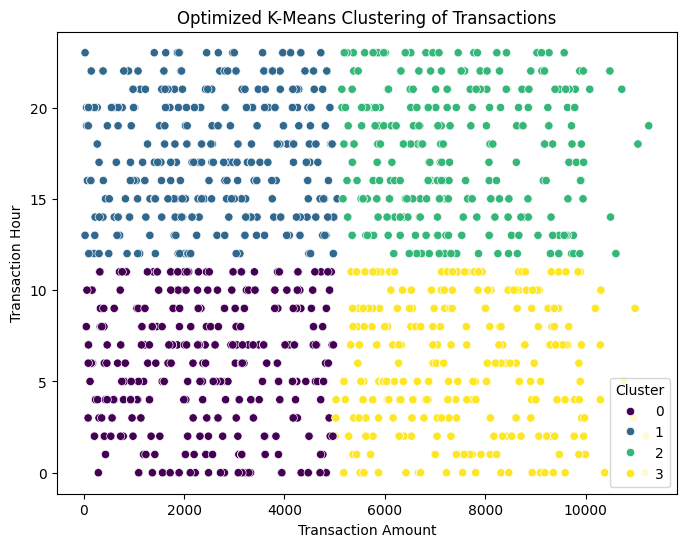


Optimized Clustering Performance:
Silhouette Score: 0.4046
Davies-Bouldin Score: 0.7741
Calinski-Harabasz Index: 1470.8292


In [67]:
def kmeans_silhouette(n_clusters):
    
    n_clusters = int(n_clusters)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    # Calculate and return the silhouette score
    score = silhouette_score(data_scaled, labels)
    return score

optimizer = BayesianOptimization(
    f=kmeans_silhouette,
    pbounds={'n_clusters': (2, 10)},
    random_state=42
)

optimizer.maximize(init_points=5, n_iter=15)

best_n_clusters = int(optimizer.max['params']['n_clusters'])
print("\nOptimal n_clusters found by Bayesian Optimization:", best_n_clusters)

best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42, n_init=10)
data['Optimized_Cluster'] = best_kmeans.fit_predict(data_scaled)

print("\nOptimized Cluster Analysis:")
print(data.groupby('Optimized_Cluster')[numeric_features].mean())

# Visualize the optimized clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Amount'], y=data['Hour'], hue=data['Optimized_Cluster'], palette='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Hour')
plt.title('Optimized K-Means Clustering of Transactions')
plt.legend(title='Cluster')
plt.show()

sil_optimized = silhouette_score(data_scaled, data['Optimized_Cluster'])
db_optimized = davies_bouldin_score(data_scaled, data['Optimized_Cluster'])
ch_optimized = calinski_harabasz_score(data_scaled, data['Optimized_Cluster'])

print("\nOptimized Clustering Performance:")
print(f"Silhouette Score: {sil_optimized:.4f}")
print(f"Davies-Bouldin Score: {db_optimized:.4f}")
print(f"Calinski-Harabasz Index: {ch_optimized:.4f}")


__K-Means vs. Gaussian Mixture Model (GMM) Clustering - A Comparative Analysis__

In [68]:
# K-Means Clustering
# Apply K-Means with assumed optimal clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

#Gaussian Mixture Model (GMM) Clustering**
# Apply GMM with assumed optimal clusters (e.g., 3)
gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(data_scaled)

#Clustering Evaluation**
sil_kmeans = silhouette_score(data_scaled, data['KMeans_Cluster'])
db_kmeans = davies_bouldin_score(data_scaled, data['KMeans_Cluster'])
ch_kmeans = calinski_harabasz_score(data_scaled, data['KMeans_Cluster'])

sil_gmm = silhouette_score(data_scaled, data['GMM_Cluster'])
db_gmm = davies_bouldin_score(data_scaled, data['GMM_Cluster'])
ch_gmm = calinski_harabasz_score(data_scaled, data['GMM_Cluster'])

print("\nClustering Performance Comparison")
print(f" Silhouette Score:\n   K-Means: {sil_kmeans:.4f} | GMM: {sil_gmm:.4f}")
print(f" Davies-Bouldin Score \n   K-Means: {db_kmeans:.4f} | GMM: {db_gmm:.4f}")
print(f" Calinski-Harabasz Index \n   K-Means: {ch_kmeans:.4f} | GMM: {ch_gmm:.4f}")


print("\nClustering Performance Comparison after Hyper parameter tuning(Bayesian Optimization)")
print(f" Silhouette Score:\n   K-Means:  {sil_optimized:.4f} | GMM: {sil_gmm_optimized:.4f}")
print(f" Davies-Bouldin Score \n   K-Means:  {db_optimized:.4f} | GMM: {db_gmm_optimized:.4f}")
print(f" Calinski-Harabasz Index \n   K-Means: {ch_optimized:.4f} | GMM: {ch_gmm_optimized:.4f}")







Clustering Performance Comparison
 Silhouette Score:
   K-Means: 0.3830 | GMM: 0.3696
 Davies-Bouldin Score 
   K-Means: 0.8546 | GMM: 0.8843
 Calinski-Harabasz Index 
   K-Means: 1156.5603 | GMM: 1099.7279

Clustering Performance Comparison after Hyper parameter tuning(Bayesian Optimization)
 Silhouette Score:
   K-Means:  0.4046 | GMM: 0.4027
 Davies-Bouldin Score 
   K-Means:  0.7741 | GMM: 0.7748
 Calinski-Harabasz Index 
   K-Means: 1470.8292 | GMM: 1442.3044
